In [78]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [79]:
# Market Share for Each Genre 1995-2020

In [80]:
html_page = requests.get('https://www.the-numbers.com/market/genres')
soup = BeautifulSoup(html_page.content,'html.parser')

In [81]:
table=soup.find('table')


In [82]:
genres=pd.read_html(str(table))[0]
genres

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1064,"$63,774,679,468",9133100587,27.33%
1,2,Action,1027,"$47,447,371,271",6732490298,20.33%
2,3,Drama,5304,"$37,247,226,132",5708274685,15.96%
3,4,Comedy,2322,"$33,968,804,503",5233609995,14.56%
4,5,Thriller/Suspense,1088,"$19,523,649,656",2848692471,8.37%
5,6,Horror,602,"$11,746,158,344",1697784673,5.03%
6,7,Romantic Comedy,594,"$9,918,998,969",1599171071,4.25%
7,8,Musical,183,"$4,105,510,294",542119892,1.76%
8,9,Documentary,2320,"$2,237,371,022",336012688,0.96%
9,10,Black Comedy,187,"$1,662,663,471",231354541,0.71%


In [83]:
genres['Total Box Office'] = genres['Total Box Office'].replace({'\$': ''}, regex=True)
genres['Share'] = genres['Share'].replace({'%': ''}, regex=True)
genres['Total Box Office'] = genres['Total Box Office'].replace({',': ''}, regex=True)
                                                               

In [84]:
genres

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1064,63774679468,9133100587,27.33
1,2,Action,1027,47447371271,6732490298,20.33
2,3,Drama,5304,37247226132,5708274685,15.96
3,4,Comedy,2322,33968804503,5233609995,14.56
4,5,Thriller/Suspense,1088,19523649656,2848692471,8.37
5,6,Horror,602,11746158344,1697784673,5.03
6,7,Romantic Comedy,594,9918998969,1599171071,4.25
7,8,Musical,183,4105510294,542119892,1.76
8,9,Documentary,2320,2237371022,336012688,0.96
9,10,Black Comedy,187,1662663471,231354541,0.71


In [88]:
# df_genre_sub['MarketShare'] = df_genre_sub['MarketShare'].str.replace('%', '')
# genres['Total Box Office'] = pd.to_numeric(genres['Total Box Office'], errors='coerce')
# genres['Movies'] = pd.to_numeric(genres['Movies'], errors='coerce')
#genres.astype({'Total Box Office': 'int32'}).dtypes

genres['Total Box Office'] = genres['Total Box Office'].astype(int)
genres['Total Box Office'][0]


63774679468

In [89]:
type(genres['Total Box Office'][0])

numpy.int64

In [91]:
genres['Money Per Movie']= genres['Total Box Office']//genres['Movies']
genres['Money Per Movie']

0     59938608
1     46199972
2      7022478
3     14629114
4     17944530
5     19511890
6     16698651
7     22434482
8       964384
9      8891248
10    13392412
11     5339943
12      802109
13      155424
Name: Money Per Movie, dtype: int64

Text(0.5, 1.0, 'Cost Per Movie')

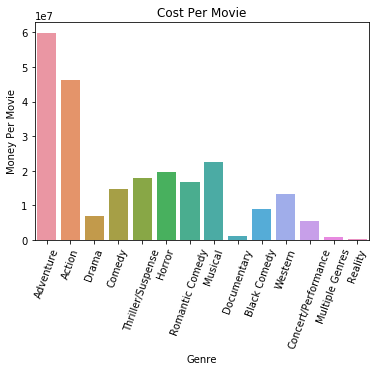

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
g=sns.barplot(x='Genre',y='Money Per Movie',data=genres)
g.set_xticklabels(g.get_xticklabels(),rotation=70)
plt.title('Cost Per Movie')

In [17]:
# convert dframe to tuple
tuple_genres=list(genres.itertuples(index=False,name=None))


In [18]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)
print(config.my_cred['user'])
print(cnx)

admin


In [19]:
cursor = cnx.cursor()

In [20]:
db_name = 'movies'

In [21]:
def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)

In [22]:
try:
    cursor.execute("USE {}".format(db_name))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name
    else:
        print(err)
        exit(1)

In [23]:
DB_NAME = 'movies'

TABLES = {}
TABLES['genre'] = (
    "CREATE TABLE genre ("
    "  R_id varchar(20) NOT NULL,"
    "  Genre varchar(190) NOT NULL,"
    "  Movies int(190) NOT NULL,"
    "  Total_Box_Office varchar(50) NOT NULL,"
    "  Tickets int(50) NOT NULL,"
    "  Share double(10,2) NOT NULL,"
    "  PRIMARY KEY (R_id)"
    ") ENGINE=InnoDB")



In [24]:
try:
    cursor.execute("USE {}".format(DB_NAME))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(DB_NAME))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, DB_NAME)
        print("Database {} created successfully.".format(DB_NAME))
        cnx.database = DB_NAME
    else:
        print(err)
        exit(1)
        
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

# cursor.close()
# cnx.close()

Creating table genre: already exists.


In [25]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)
cnx.database = 'movies'
print(cnx)

In [26]:
# cursor.close()
# cnx.close()

In [27]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)
cnx.database = 'movies'
print(cnx)

In [28]:
cursor = cnx.cursor()

In [29]:
cursor.executemany(
      """INSERT INTO genre(R_id, Genre, Movies, Total_Box_Office, Tickets, Share)
      VALUES (%s, %s, %s, %s, %s, %s)""",
      tuple_genres)
cnx.commit()

IntegrityError: 1062 (23000): Duplicate entry '1' for key 'PRIMARY'

In [30]:
# individual genre

In [31]:
list_gener = []

for genre in genres['Genre']:
    genre_url='https://www.the-numbers.com/market/genre/'+genre.replace('/','-or-').replace(' ','-')
    res=requests.get(genre_url)
    soup=BeautifulSoup(res.text,'html.parser')
    tables=soup.find_all('table')
    df2=pd.read_html(str(tables[1]))[0]
    df2['Genre']=genre
    list_gener.append(df2)
for df in list_gener:
        df['Id'] = df['Year'].apply(str).add(df['Genre'])

In [32]:
df_genre=pd.concat(list_gener)
df_genre

,Year,Movies inRelease,MarketShare,Gross,Tickets Sold,Inflation-AdjustedGross,Top-Grossing Movie,Gross that Year,Genre,Id
0,1995,29,14.52%,"$771,507,571",177358047,"$1,615,731,808",Toy Story,"$150,148,222",Adventure,1995Adventure
1,1996,34,22.37%,"$1,290,490,033",291966054,"$2,659,810,752",Independence Day,"$306,169,255",Adventure,1996Adventure
2,1997,23,13.87%,"$881,902,843",192135684,"$1,750,356,081",Men in Black,"$250,650,052",Adventure,1997Adventure
3,1998,29,23.84%,"$1,614,467,732",344236174,"$3,135,991,545",Armageddon,"$201,578,182",Adventure,1998Adventure
4,1999,27,21.97%,"$1,612,432,107",317407880,"$2,891,585,787",Star Wars Ep. I: The Phanto…,"$430,443,350",Adventure,1999Adventure
...,...,...,...,...,...,...,...,...,...,...
16,2017,5,0.04%,"$4,614,134",514394,"$4,686,129",2017 Oscar Shorts,"$2,835,355",Multiple Genres,2017Multiple Genres
17,2018,3,0.04%,"$4,787,450",525514,"$4,787,433",2018 Oscar Shorts,"$3,508,777",Multiple Genres,2018Multiple Genres
18,2019,2,0.03%,"$3,545,060",389139,"$3,545,056",2019 Oscar Shorts,"$3,531,093",Multiple Genres,2019Multiple Genres
0,2014,1,0.00%,"$16,826",2059,"$18,757",The Principle,"$16,826",Reality,2014Reality


In [33]:
df_genre_sub = df_genre[['Year','Genre','MarketShare']]

In [34]:
df_genre_sub['MarketShare'] = df_genre_sub['MarketShare'].str.replace('%', '')
df_genre_sub['MarketShare'] = pd.to_numeric(df_genre_sub['MarketShare'], errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_genre_sub['MarketShare']=df_genre_sub['MarketShare']/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_genre_sub

,Year,Genre,MarketShare
0,1995,Adventure,0.1452
1,1996,Adventure,0.2237
2,1997,Adventure,0.1387
3,1998,Adventure,0.2384
4,1999,Adventure,0.2197
...,...,...,...
16,2017,Multiple Genres,0.0004
17,2018,Multiple Genres,0.0004
18,2019,Multiple Genres,0.0003
0,2014,Reality,0.0000


Text(0.5, 1, 'Market Share by Year')

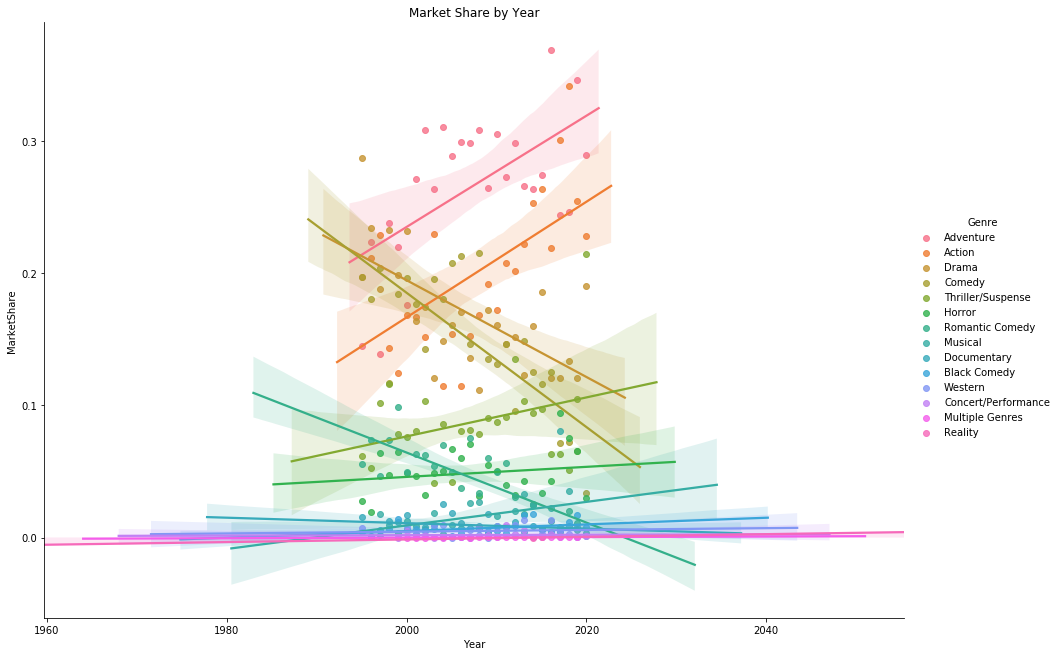

In [113]:
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x='Year',y='MarketShare',data=df_genre_sub,height=9, aspect=10/7,
           fit_reg=True, hue='Genre', legend=True)
plt.title("Market Share by Year")

In [38]:
# Most Profitable Movies, Based on Absolute Profit on Worldwide Gross

In [39]:
html_page = requests.get('https://www.the-numbers.com/movie/budgets')
soup = BeautifulSoup(html_page.content,'html.parser')

In [40]:
tables=soup.find_all('table')

In [41]:
profitable_movies=pd.read_html(str(tables[2]))[0]

In [42]:
profitable_movies.dropna(inplace=True)
profitable_movies

,Unnamed: 0,Release Date,Movie,Approx. Income,Approx. Expense,Profit
0,1.0,"Dec 18, 2009",Avatar,"$1,796,444,222","$328,262,000","$1,468,182,222"
2,2.0,"Apr 26, 2019",Avengers: Endgame,"$1,480,049,231","$475,560,000","$1,004,489,231"
4,3.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$1,224,827,707","$381,704,000","$843,123,707"
6,4.0,"Nov 22, 2013",Frozen,"$1,042,582,430","$245,904,000","$796,678,430"
8,5.0,"Nov 18, 2005",Harry Potter and the Goblet of Fire,"$997,569,652","$208,064,000","$789,505,652"
10,6.0,"Apr 27, 2018",Avengers: Infinity War,"$1,125,651,663","$368,812,000","$756,839,663"
12,7.0,"May 4, 2012",The Avengers,"$998,585,807","$300,290,000","$698,295,807"
14,8.0,"Jun 12, 2015",Jurassic World,"$962,588,221","$287,756,000","$674,832,221"
16,9.0,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$833,252,878","$177,306,000","$655,946,878"
18,10.0,"Jul 3, 2013",Despicable Me 2,"$735,831,589","$143,056,000","$592,775,589"


In [43]:
# convert dframe to tuple
tuple_profitable=list(profitable_movies.itertuples(index=False,name=None))

In [44]:
tuple_profitable[0]

(1.0,
 'Dec 18, 2009',
 'Avatar',
 '$1,796,444,222',
 '$328,262,000',
 '$1,468,182,222')

In [45]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)

print(cnx)

In [46]:
cursor = cnx.cursor()

In [47]:
DB_NAME = 'movies'

TABLES = {}
TABLES['profitable'] = (
    "CREATE TABLE profitable ("
    "  Release_Date varchar(30) NOT NULL,"
    "  Movie varchar(190) NOT NULL,"
    "  Approx_Income varchar(12) NOT NULL,"
    "  Approx_Expense varchar(12) NOT NULL,"
    "  Profit  varchar(12) NOT NULL"
    ") ENGINE=InnoDB")

In [48]:
try:
    cursor.execute("USE {}".format(DB_NAME))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(DB_NAME))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, DB_NAME)
        print("Database {} created successfully.".format(DB_NAME))
        cnx.database = DB_NAME
    else:
        print(err)
        exit(1)
        
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

# cursor.close()
# cnx.close()

Creating table profitable: already exists.


In [49]:
cursor.executemany(
      """INSERT INTO profitable
      (Release_Date, Movie , Approx_Income, Approx_Expense, Profit)
      VALUES (%s,%s,%s,%s,%s)""",
      tuple_profitable)
cnx.commit()


InterfaceError: Failed executing the operation; Not all parameters were used in the SQL statement

In [ ]:
# Biggest Money Losers, Based on Absolute Loss on Worldwide Earnings

In [ ]:
html_page = requests.get('https://www.the-numbers.com/movie/budgets')
soup = BeautifulSoup(html_page.content,'html.parser')

In [ ]:
tables=soup.find_all('table')

In [ ]:
money_losers=pd.read_html(str(tables[4]))[0]

In [ ]:
money_losers.dropna(inplace=True)
money_losers.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
# convert dframe to tuple
tuple_loss=list(money_losers.itertuples(index=False,name=None))
tuple_loss

In [ ]:
import mysql.connector
from mysql.connector import errorcode
import config
cnx = mysql.connector.connect(
    host = config.my_cred['host'],
    user = config.my_cred['user'],
    passwd = config.my_cred['passwd']
)
cnx.database = 'movies'
print(cnx)

In [ ]:
cursor = cnx.cursor()

In [ ]:
DB_NAME = 'movies'

TABLES = {}
TABLES['loss'] = (
    "CREATE TABLE loss ("
    "  Release_Date varchar(30) NOT NULL,"
    "  Movie varchar(190) NOT NULL,"
    "  Approx_Income varchar(12) NOT NULL,"
    "  Approx_Expense varchar(12) NOT NULL,"
    "  loss varchar(12) NOT NULL"
    ") ENGINE=InnoDB")

In [ ]:
try:
    cursor.execute("USE {}".format(DB_NAME))

#if the previous line fails because there isn't a db by that name run this line

except mysql.connector.Error as err:
    print("Database {} does not exists.".format(DB_NAME))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, DB_NAME)
        print("Database {} created successfully.".format(DB_NAME))
        cnx.database = DB_NAME
    else:
        print(err)
        exit(1)
        
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")

# cursor.close()
# cnx.close()

In [ ]:
cursor.executemany(
      """INSERT INTO loss (Release_Date, Movie , Approx_Income, Approx_Expense, loss)
      VALUES (%s,%s,%s,%s,%s)""",
      tuple_loss)
cnx.commit()